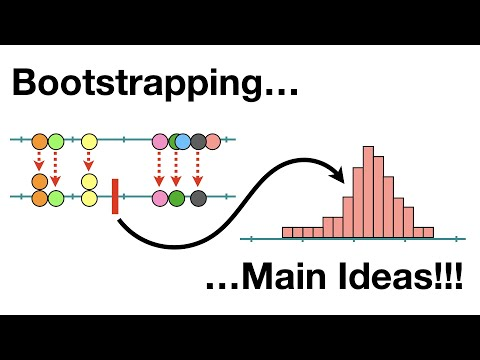

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1.

SD (standard deviation): Standard deviation is the measuring variations of different individual data points across the mean of the data. It demonstrates and informs how much the data points drifts from the average. A bigger deviation means that the data is more spread out with more variability. On the other hand, a smaller deviation means that the data points are closer together and closer to the average of the dataset. 

SEM (Standard error of the mean): The standard error of the mean measures the precision and accuracy of the sample mean in estimating the population mean. The result is based on the estimate of the average as it is measured with the sample instead of the entire population. A small SEM gives a more accurate estimate and as sample size increases SEM becomes more accurate, resulting in a smaller SEM. 

The difference between SD and SEM is that SD measures and describes how the data points are spread out, while SEM measure the accuracy and precision of a sample mean. 

2.

You can use the SEM to create a 95% confidence interval that covers 95% of the bootstrapped sample means by first calculating the sample mean and the SEM using the formula. Next, you have to calculate the critical value for the confidence interval. Finally, you add or minus the product of the critical value and the SEM to the sample mean. This yields 2 value which are the intervals. This method can be used to roughly interpret bootstrapped means.

3. 

First, you need to make bootstrapped samples and calculate the mean of each sample. Next, you need to order the samples in ascending order and establish the cutoffs for the 95% interval. You can do this by finding the 2.5% and 97.5% of the means. You can also find the percentiles needed by using the np.quantile(...) function. 

In [14]:
import numpy as np

# Sample data (replace this with your actual sample data)
data = np.array([12, 15, 14, 10, 18, 20, 17, 16, 19, 13])

# Number of bootstrap resamples
B = 10000

# Function to compute the statistic of interest (mean in this case)
def bootstrap_statistic(data, B, statistic_fn):
    """
    Perform bootstrap resampling to estimate the confidence interval for a given statistic.
    
    Parameters:
    - data: The original sample data (numpy array).
    - B: The number of bootstrap resamples.
    - statistic_fn: A function that calculates the statistic (e.g., np.mean or np.median).
    
    Returns:
    - boot_stats: Array of bootstrapped statistics (one for each resample).
    """
    boot_stats = np.array([statistic_fn(np.random.choice(data, size=len(data), replace=True)) for _ in range(B)])
    return boot_stats

# Get the bootstrapped sample means (statistic_fn = np.mean for mean)
boot_means = bootstrap_statistic(data, B, np.mean)

# Compute the 95% confidence interval using the percentile method
lower_bound_mean = np.quantile(boot_means, 0.025)  # 2.5th percentile
upper_bound_mean = np.quantile(boot_means, 0.975)  # 97.5th percentile

# Output the results
print(f"95% Bootstrapped Confidence Interval for the Mean: [{lower_bound_mean}, {upper_bound_mean}]")

# ### To create a bootstrap confidence interval for the median ###
# Get the bootstrapped sample medians (statistic_fn = np.median for median)
boot_medians = bootstrap_statistic(data, B, np.median)

# Compute the 95% confidence interval for the median
lower_bound_median = np.quantile(boot_medians, 0.025)  # 2.5th percentile
upper_bound_median = np.quantile(boot_medians, 0.975)  # 97.5th percentile

# Output the results for median
print(f"95% Bootstrapped Confidence Interval for the Median: [{lower_bound_median}, {upper_bound_median}]")


95% Bootstrapped Confidence Interval for the Mean: [13.5, 17.2]
95% Bootstrapped Confidence Interval for the Median: [13.0, 18.0]


5. 

A population parameter is an unknown value describes a characteristic of the population, it exists because it is not possible to collect data from a whole population. A sample statistic is a value from the sample which is a subset of the population and used to estimate the population parameter. The two are different and have different purposes. The confidence interval is created by using the sample statistic to make predictions and inferences about the population parameter. 

6.

1. What is the process of bootstrapping?

The process of bootstrapping to taking a sample data mean and repeatedly resampling with replacement and create a new distribution of the statistics. The distribution can estimate the standard error, make confidence intervals, and make inference about the population parameters. 

2. What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to estimate the sampling distribution of a statistic like the mean and median. It is used as a easier method to measure the variability of a statistic.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

You can use bootstrapping to assess whether or not your guess might be plausible by first making a hypothesis. Then, generate a bootstrapped sample by resampling the original sample with replacements and repeated this process a large number of times. From the bootstrapped sample, calculate the statistic needed and create the confidence interval and then directly compare the hypothesis to the sample. Your hypothesis should be insdie the range of the interval for it to be considered plausible. 

7. 

the confidence interval overlapping zero fails to reject the null hypothesis because when zero is included in the interval, it means that the population parameter could be zero and it cannot be confidently rejected based on the data. Alternatively, when the confidence interval excludes zero, meaning the true population parameter is unlikely to be zero, you can reject the null hypothesis. 

In [15]:
8. 


import pandas as pd
import numpy as np
from scipy import stats

# Step 1: Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Step 2: Calculate the change in health scores
df['ChangeInHealthScore'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 3: Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(df['FinalHealthScore'], df['InitialHealthScore'])

# Step 4: Calculate the mean change and 95% confidence interval
mean_change = np.mean(df['ChangeInHealthScore'])
std_change = np.std(df['ChangeInHealthScore'], ddof=1)  # Sample standard deviation
n = len(df)  # Number of samples
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate the standard error of the mean
sem = std_change / np.sqrt(n)

# Calculate the margin of error
h = sem * stats.t.ppf(1 - alpha/2, df=n-1)

# Confidence interval
ci_lower = mean_change - h
ci_upper = mean_change + h

# Step 5: Interpret the results
print("Mean Change in Health Score:", mean_change)
print("Paired t-test p-value:", p_value)
print("95% Confidence Interval for the Mean Change:", (ci_lower, ci_upper))

# Decision based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: The vaccine is effective.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude the vaccine is effective.")


Mean Change in Health Score: 3.3
Paired t-test p-value: 0.02921052381549256
95% Confidence Interval for the Mean Change: (0.4177833188707214, 6.182216681129278)
Reject the null hypothesis: The vaccine is effective.


In [20]:
import plotly.express as px
fig = px.histogram(df, x="Age")
fig.show()

In [21]:
fig = px.box(df, x="FinalHealthScore")
fig.show()

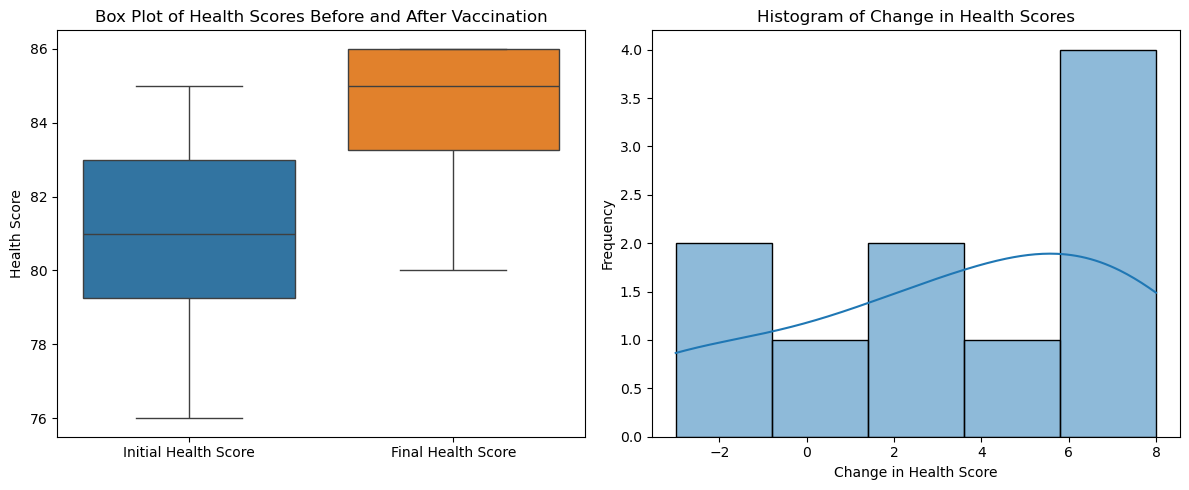

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the change in health scores
df['ChangeInHealthScore'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Set up the figure for boxplot
plt.figure(figsize=(12, 5))

# Box Plot for Initial and Final Health Scores
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['InitialHealthScore', 'FinalHealthScore']])
plt.title('Box Plot of Health Scores Before and After Vaccination')
plt.ylabel('Health Score')
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])

# Histogram for Change in Health Scores
plt.subplot(1, 2, 2)
sns.histplot(df['ChangeInHealthScore'], bins=5, kde=True)
plt.title('Histogram of Change in Health Scores')
plt.xlabel('Change in Health Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Based on the visual representation of the box plots and the histogram, we can clearly identity the difference between the initial health score and the the final health score after the vaccination. We can infer that there is a direct correlation between the vaccination and the health scores. Furthermore, we can conclude that the vaccine is effective. 

Summary of the Chat
Understanding Confidence Intervals:

Discussed the difference between the standard error of the mean (SEM) and standard deviation (SD), focusing on their roles in estimating population parameters.
Explored how to create a 95% confidence interval using the SEM and the bootstrapped sample means.
Bootstrapping Method:

Defined the bootstrapping process and its main purpose: to estimate the sampling distribution of a statistic (like the mean or median) by resampling with replacement from the original data.
Explained how to use bootstrapping to assess the plausibility of a hypothesized population mean based on sample data.
Hypothesis Testing:

Clarified the significance of confidence intervals overlapping zero and how this relates to failing to reject the null hypothesis.
Discussed conditions under which one would reject the null hypothesis, particularly focusing on confidence intervals that do not include zero.
Vaccine Effectiveness Analysis:

Analyzed data from AliTech on a new vaccine by performing a statistical analysis to determine its effectiveness.
Provided Python code to calculate the change in health scores, perform a paired t-test, and generate confidence intervals.
Suggested visualizations (box plot and histogram) to present the initial insights into the health score data before and after vaccination.
Quantitative Analysis:

Detailed the method of a paired t-test, its purpose, and its interpretation in the context of the vaccine data.
Summarized the outputs of the statistical analysis, including mean changes, p-values, and confidence intervals, to support conclusions regarding the vaccine's effectiveness.
Overall, the chat provided a comprehensive overview of statistical methods related to confidence intervals, bootstrapping, hypothesis testing, and a practical application in assessing vaccine effectiveness through data analysis.

https://chatgpt.com/share/66ff660e-3af4-8011-ae96-35f9303e3b70 